In [30]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [31]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-labels-idx1-ubyte.gz
# Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-images-idx3-ubyte.gz

In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [33]:
train_images.shape

(60000, 28, 28)

In [34]:
len(train_labels)

60000

In [35]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [36]:
test_images.shape

(10000, 28, 28)

In [37]:
len(test_labels)

10000

### 데이터 전처리

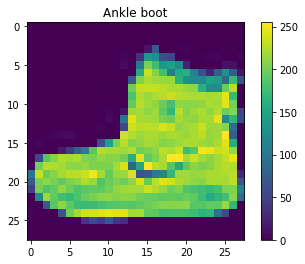

In [38]:
plt.figure()
plt.imshow(train_images[0])
plt.title(class_names[train_labels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

# 픽셀값의 범위가 0~255 사이임을 알 수 있다.

In [39]:
# 신경망 모델에 주입하기 전에 픽셀 값의 범위를 0~1 사이로 조정
train_images = train_images / 255.0
test_images = test_images / 255.0

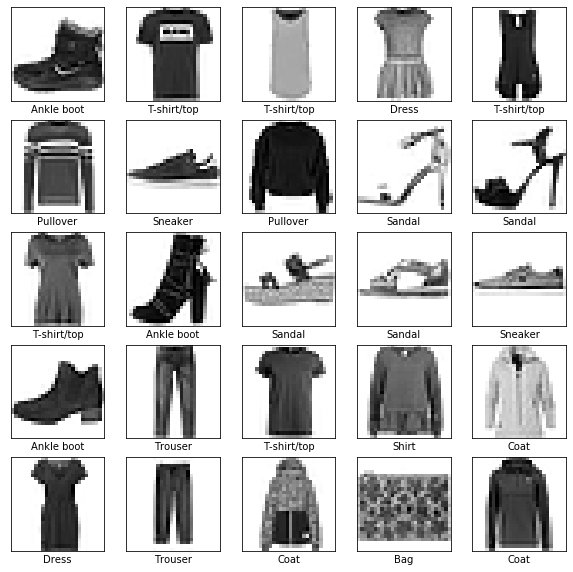

In [40]:
# 처음 25개 이미지와 그 아래 클래스 이름 출력하기
# 데이터 포맷이 올바른지 확인하고 네트워크 구성과 훈련할 준비를 마친다.

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 모델 구성
- 신경망 모델을 만들기 위해 모델의 층을 구성한 다음 모델을 컴파일 한다.
#### 층 설정
- 층(layer) : 신경망의 기본 구성 요소
    - 주입 된 데이터에서 표현을 추출
    - 딥러닝은 간단한 층을 연결하여 구성된다.
    - `tf.keras.layers.Dense`와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습된다.

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

- tf.keras.layers.Flatten
    - 2차원 배열(28*28 픽셀)의 이미지 포맷을 28*28=784 픽셀의 1차원 배열로 변환
    - 이미지에 있는 픽셀의 행을 펼쳐저 일렬로 늘린다.
    - 학습되는 가중치가 없고, 데이터를 변환하기만 한다.
    
- 2 개의 tf.keras.layers.Dense
    - 밀집 연결(densely-connected), 완전 연결(fully-connected) 층
    - 첫 번째 Dense 층 : 128 개의 노드(또는 뉴런)를 가짐
    - 두 번째 Dense 층 : 10 개의 노드의 소프트맥스(softmax) 층
        - 10개의 확률을 반환하고 반환 된 전체 합은 1
        - 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력한다.
 

- https://tykimos.github.io/2017/01/27/MLP_Layer_Talk/

- 첫번째 인자 : 출력 뉴런의 수를 설정합니다.
- input_dim : 입력 뉴런의 수를 설정합니다.
- init : 가중치 초기화 방법 설정합니다.
    - ‘uniform’ : 균일 분포
    - ‘normal’ : 가우시안 분포
- activation : 활성화 함수 설정합니다.
    - ‘linear’ : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옵니다.
    - ‘relu’ : rectifier 함수, 은익층에 주로 쓰입니다.
    - ‘sigmoid’ : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰입니다.
    - ‘softmax’ : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.

#### 모델 컴파일
- 모델을 훈련하기 전에 필요한 몇 가지 설정을 추가하는 단계
- 손실 함수(Loss function) : 훈련 하는 동안 모델의 오차를 측정한다. 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화 해야 한다.
- 옵티마이저(Optimizer) : 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정 한다.
- 지표(Metrics) : 훈련 단계와 테스트 단계를 모니터링하기 위해 사용한다. 
    - 정확도 : 올바르게 분류된 데이터의 비율

In [42]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 모델 훈련
- 신경망 모델을 훈련하는 단계
    1. 훈련 데이터를 모델에 주입한다. (train_images, train_labels 배열)
    2. 모델이 이미지와 레이블을 매핑하는 방법을 배운다.
    3. 테스트 세트에 대한 모델의 예측을 만든다. (test_images 배열) 이 예측이 test_labels 배열의 레이블과 맞는지 확인한다.

훈련을 시작하기 위해 model.fit 메서드를 호출하면 모델이 훈련 데이터를 학습 한다.
모델이 훈련 되면서 손실과 정확도 지표가 출력 된다. 

In [43]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4983 - accuracy: 0.8245

이 모델은 훈련 세트에서 약 0.88(88%) 정도의 정확도를 달성

### 정확도 평가
테스트 세트에서 모델의 성능 비교

In [44]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/1 - 0s - loss: 0.2712 - accuracy: 0.8656

테스트 정확도: 0.8656


테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮다. 
훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합(overfitting) 때문으로
과대적합은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말한다.

### 예측 만들기
훈련된 모델을 사용하여 이미지에 대한 예측 만들기


In [45]:
predictions = model.predict(test_images)

In [46]:
predictions[0]

array([2.1630287e-05, 2.1174382e-07, 6.8054953e-07, 5.2318987e-06,
       1.8860252e-06, 6.4092115e-02, 1.3174825e-05, 1.5934378e-01,
       5.7038129e-04, 7.7595091e-01], dtype=float32)

In [47]:
np.argmax(predictions[0])

9

In [48]:
test_labels[0]

9

In [49]:
# 10 개 클래스에 대한 예측을 그래프로 표현하기

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
    

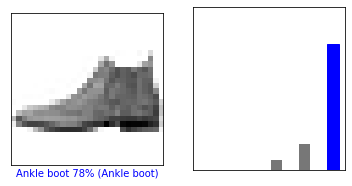

In [50]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

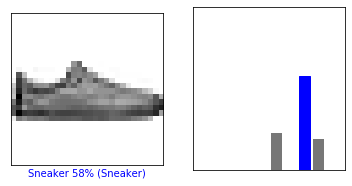

In [51]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

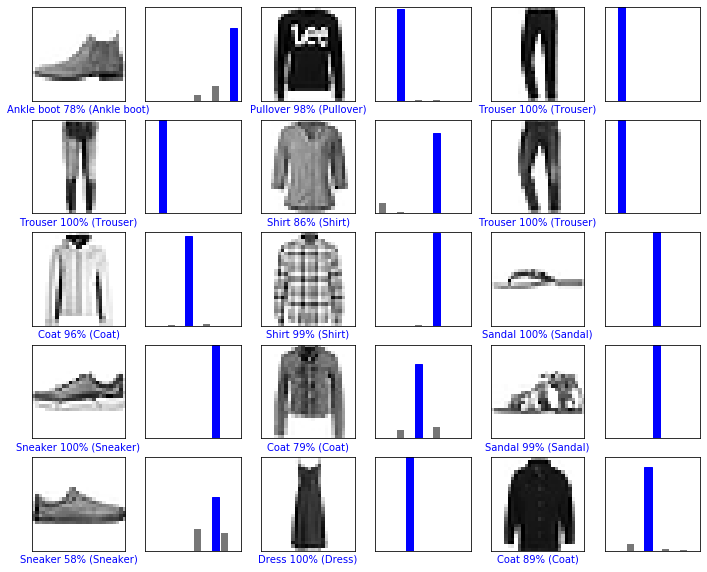

In [52]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타낸다.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [53]:
# 훈련 된 모델을 사용하여 한 이미지에 대한 예측 만들기

img = test_images[0]
print(img.shape)

(28, 28)


In [54]:
# tf.keras 모델은 한 번에 샘플의 묶음 또는 배치(batch)로 예측을 만드는데 최적화되어 있다.
# 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 한다.
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [55]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.1630265e-05 2.1174382e-07 6.8054953e-07 5.2318942e-06 1.8860270e-06
  6.4092137e-02 1.3174825e-05 1.5934385e-01 5.7038153e-04 7.7595091e-01]]


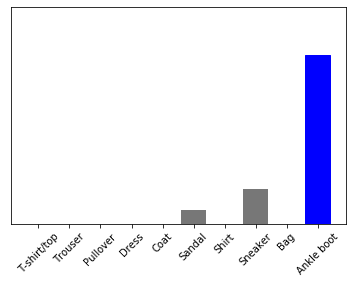

In [56]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [57]:
np.argmax(predictions_single[0])

9

In [58]:
# https://www.tensorflow.org/tutorials/keras/classification

In [59]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.
